# ***Importing the libraries***

In [110]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

% is mentioned above so as to reduce the warnings and in the given dataset  the graphs are displayed here itself

**Getting our data**

In [111]:
#load the dataset
train = pd.read_csv("/content/titanic_data.csv")

pd.read_csv method is used to read the content from the given file path

In [112]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


head method will return the first five observations<br> And the above method is showing the first five observations of the given titanic dataset

In [113]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


tail method will return the last five observations<br> And the above method is showing the last five observations of the given titanic dataset

In [114]:
train.shape

(891, 12)

From the above it is absorved that there are 891 rows and 12 columns in the given titanic dataset

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


.info is used to know the information from the given dataset <br>From the above information it is known that there are 11 rows and there is no null values ,Every value is filled with some data so it is showing the non-null in the above dataset and the datatype can be observed from thelast row of printed details and the memory usage by this is also printed in the screen

In [116]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


boolean series is returned by the isnull() method which stores True for ever NaN value and False for a Not null value. 

In [117]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From above, it is known that the features Age,cabin, Embarked has null values. These null values are to be filled.

In [118]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

There are three kinds of startings named as S,C,Q

In [119]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


desdcribe method returns the mean,median,min of the given data

**Data Visualization**

Data visualization is the act of taking information (data) and placing it into a visual context , such as a map or graph. Data visualizations make big and small data easier for the human brain to understand, and visualization also makes it easier to detect patterns, trends, and outliers in groups of data.

In [120]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing

**Data Exploration/Analysis**

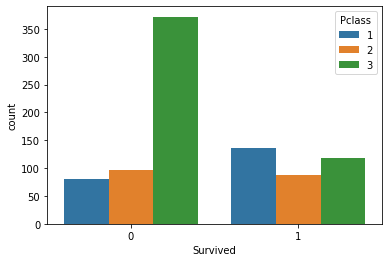

In [121]:
sns.countplot(x='Survived', hue='Pclass', data=train)

This shows the passenger classes which are survived

**Pie chart about the Survived and the death Passengers:**

([<matplotlib.patches.Wedge at 0x7fbf1d64b350>,
 [Text(0.39257483889210154, 1.0275626481479563, 'Survived'),
  Text(-0.3925747426847421, -1.0275626849034607, 'Dead')],
 [Text(0.21413173030478264, 0.5604887171716125, '38.4%'),
  Text(-0.2141316778280411, -0.5604887372200694, '61.6%')])

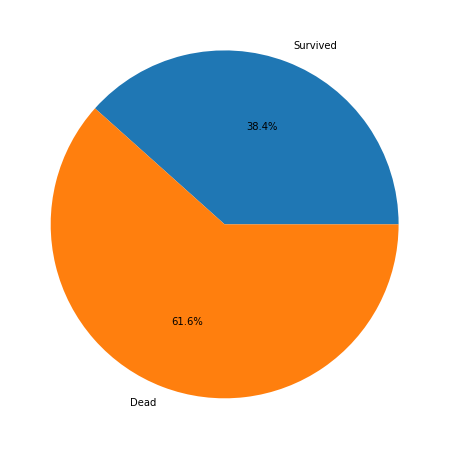

In [122]:
survived_sum=train['Survived'].sum()
dead_sum=train['Survived'].value_counts().sum()-survived_sum
lab=['Survived','Dead']
data=[survived_sum,dead_sum]
plt.figure(figsize=(8,8))
plt.pie(data,labels=lab,autopct='%1.1f%%')

The above Pie chart shows that 38.4% of Passengers have survived the mishap and 61.8% has died in the titanic

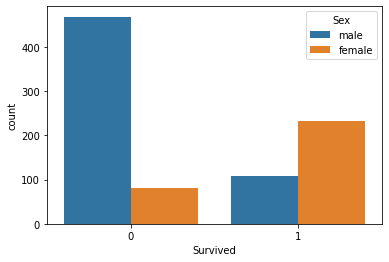

In [123]:
sns.countplot(x='Survived', hue='Sex',data=train)


From the above result, it is found that Male are largely not survived compared to Female passengers. The death count of Females are far less than Males.

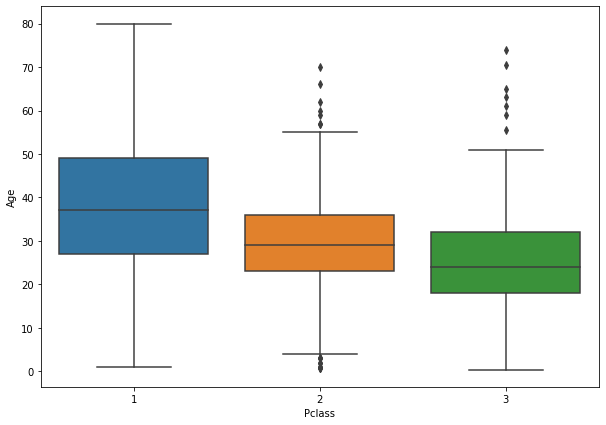

In [124]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)


From the above plot, we infer that most of the older people were traveling in first class.The youngsters who are aged between 25 and 35 were mostly traveling in second and third classes.

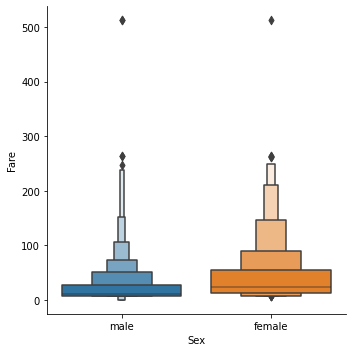

In [125]:
sns.catplot(x='Sex', y='Fare', data=train, kind='boxen')


The above box plot indicates that the fare of female passengers is greater higher than male passengers.

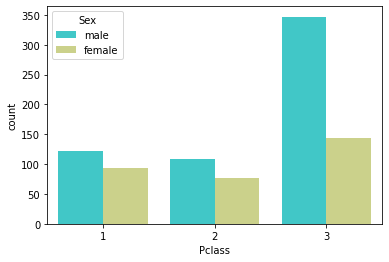

In [126]:
sns.countplot(x="Pclass", hue="Sex", data=train, palette='rainbow')

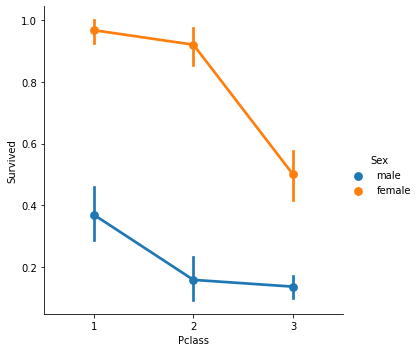

In [127]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)
plt.show()


Hence from the above,

Age plays key role in determination of survival hence it's null values have to be filled.
Female passengers have more chances of survival than Males.
Passengers of Class 1 have more chance of survival.
The features Name, PassengerId, Ticket can be deleted as they won't contibute towards prediction of survival.


**Data Cleaning**

In [128]:
miss_val=train.isnull().sum()
print(miss_val[miss_val>0])

Age         177
Cabin       687
Embarked      2
dtype: int64


this method shows only the missing values  from the given data

In [129]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

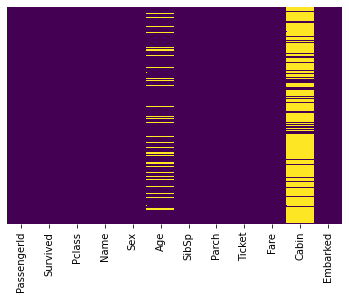

In [130]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

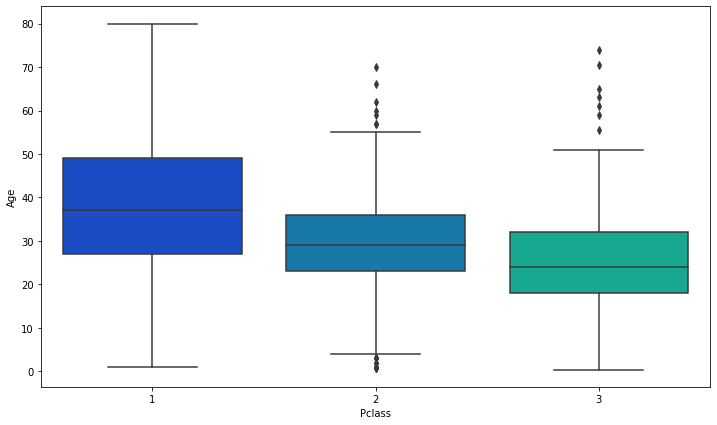

In [131]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

The above box plot relieves that the Age depends on the Class. Hence the null values containing in the column of Age are filled with the mean age of the respective Class.

In [132]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [133]:
def impute_embarked(cols):
    Embarked = cols[0]
    
    if pd.isnull(Embarked):
        return 'S'
    else:
        return Embarked
train['Embarked']=train[['Embarked']].apply(impute_embarked,axis=1)

In [134]:
train['Embarked'].isnull().sum()

0

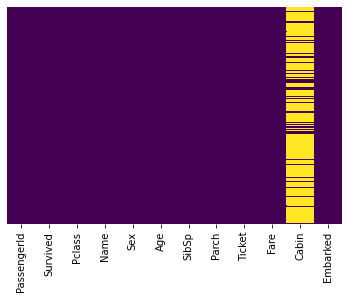

In [135]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


The above heat map shows that there are no null values

In [136]:
train.dropna(inplace=True)

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Name         204 non-null    object 
 4   Sex          204 non-null    object 
 5   Age          204 non-null    float64
 6   SibSp        204 non-null    int64  
 7   Parch        204 non-null    int64  
 8   Ticket       204 non-null    object 
 9   Fare         204 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     204 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.7+ KB


In [139]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [140]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
pclass = pd.get_dummies(train['Pclass'],drop_first=True)


The string data is converted into binary or the dummy values (categorical values) in a column are replaced by binary digits using the method .get_dummies and the first columns are dropped.

In [141]:
train.drop(['Sex','Embarked','Pclass','Name','Ticket'],axis=1,inplace=True)

In [142]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin
1,2,1,38.0,1,0,71.2833,C85
3,4,1,35.0,1,0,53.1000,C123
6,7,0,54.0,0,0,51.8625,E46
10,11,1,4.0,1,1,16.7000,G6
11,12,1,58.0,0,0,26.5500,C103


In [143]:
train = pd.concat([train,sex,embark,pclass],axis=1)


The numerical columns build after using the method .get_dummies() are concatinated to the DataFrame df using the method .concat()

In [144]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,male,Q,S,2,3
1,2,1,38.0,1,0,71.2833,C85,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,C123,0,0,1,0,0
6,7,0,54.0,0,0,51.8625,E46,1,0,1,0,0
10,11,1,4.0,1,1,16.7000,G6,0,0,1,0,1
11,12,1,58.0,0,0,26.5500,C103,0,0,1,0,0



The above Data Frame is the final cleaned data without any null values and are not of string dtype.


**Splitting Data for Training and Testing**

In [145]:
y = train["Survived"]
X = train.drop("Survived",axis=1)

The target column Survived is assigned to y and the remaining data frame without Survived column is assigned to X

In [146]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size = 0.2,random_state=1)


The available data is split into 80% for training and 20% for testing,i.e. 80%of the given data is used for training and the remaining 20% is used for testing the given data

**Building Machine Learning Models**

Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.


# **Model Validation**

In [156]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics


The required libraries/modules for finding the accuracy are being imported.

**Random Forest Classifier**

In [157]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier(random_state=101)

**Fitting**

In [ ]:
random_model.fit(train_X,train_y)

**Prediction**

In [96]:
random_preds = random_model.predict(test_X)

The predictions are ade and are assigned to random_preds. Now the accuracy is to be calculated using the imported libraries/modules.

**Score Calculation**

In [97]:
print(classification_report(test_y,random_preds))
random_acc=round(metrics.accuracy_score(test_y,random_preds)*100,0)
print("Accuracy = ",random_acc)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       106
           1       0.84      0.63      0.72        73

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179

Accuracy =  80.0



# **Decision Tree Classifier**

In [98]:
from sklearn.tree import DecisionTreeClassifier
decision_model=DecisionTreeClassifier(random_state=10)

**Fitting**

In [99]:
decision_model.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


The model is fitted with train_X and train_y for further prediction.

**Prediction**

In [100]:
decision_preds =decision_model.predict(test_X)

The predictions are ade and are assigned to decision_preds. Now the accuracy is to be calculated using the imported libraries/modules.

**Score Calculation**

In [101]:
print(classification_report(test_y,decision_preds))
decision_acc=round(metrics.accuracy_score(test_y,decision_preds)*100,2)
print("Accuracy = ",decision_acc)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       106
           1       0.70      0.64      0.67        73

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179

Accuracy =  74.3


# **Logistic Regresion**

In [102]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(random_state=11)

**Fitting**

In [103]:
log_model.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=11, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Prediction**

In [104]:
log_preds=log_model.predict(test_X)


The predictions are ade and are assigned to log_preds. Now the accuracy is to be calculated using the imported libraries/modules.

**Score Validation**

In [106]:

print(classification_report(test_y,log_preds))
log_acc=round(metrics.accuracy_score(test_y,log_preds)*100,2)
print("Accuracy = ",log_acc)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       106
           1       0.77      0.66      0.71        73

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

Accuracy =  78.21


# **Accuracy Values**

In [107]:
results = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','LogisticRegression', 
              'RandomForestClassifier' 
              ],
    'Accuracy': [decision_acc,log_acc,random_acc]})
result_df = results.sort_values(by='Accuracy',ascending=0)
result_df = result_df.set_index('Accuracy')
results.head()

,Model,Accuracy
0,DecisionTreeClassifier,74.30
1,LogisticRegression,78.21
2,RandomForestClassifier,80.00



The above DataFrame shows the accuracies obtained from the respective models.